In [3]:
# Import basic libraries
import pandas as pd
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd

# Replace with your actual path
file_path = '/content/drive/My Drive/MentalHealthProject/student_mental_health_dataset.csv'

df = pd.read_csv(file_path)
df.head()

,age,gender,academic_performance,financial_stress,family_support,peer_support,exercise_frequency,hours_of_sleep,screen_time_hours,substance_use,academic_pressure,social_media_use,mental_health_support,diagnosed_mental_illness
0,24,Other,2.70,0,2,3,5,5.7,6.6,0,2,4,1,0
1,21,Female,3.87,1,5,1,3,7.8,1.7,0,9,1,1,1
2,22,Other,2.08,1,9,9,5,5.8,5.1,0,8,1,1,1
3,24,Other,2.84,1,9,8,2,7.1,4.4,0,3,2,0,1
4,20,Other,3.94,0,8,2,5,5.4,5.5,0,8,2,1,0


In [7]:
# Check the structure and datatypes
df.info()

# See column names and data preview
df.head()

# Check for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       300 non-null    int64  
 1   gender                    300 non-null    object 
 2   academic_performance      300 non-null    float64
 3   financial_stress          300 non-null    int64  
 4   family_support            300 non-null    int64  
 5   peer_support              300 non-null    int64  
 6   exercise_frequency        300 non-null    int64  
 7   hours_of_sleep            300 non-null    float64
 8   screen_time_hours         300 non-null    float64
 9   substance_use             300 non-null    int64  
 10  academic_pressure         300 non-null    int64  
 11  social_media_use          300 non-null    int64  
 12  mental_health_support     300 non-null    int64  
 13  diagnosed_mental_illness  300 non-null    int64  
dtypes: float64

,0
age,0
gender,0
academic_performance,0
financial_stress,0
family_support,0
peer_support,0
exercise_frequency,0
hours_of_sleep,0
screen_time_hours,0
substance_use,0


In [8]:
# Encode 'gender' (you can do the same for others if needed)
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])


In [9]:
X = df.drop('diagnosed_mental_illness', axis=1)
y = df['diagnosed_mental_illness']


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [12]:
y_pred = model.predict(X_test)


In [13]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9333333333333333

Confusion Matrix:
 [[28  0]
 [ 4 28]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93        28
           1       1.00      0.88      0.93        32

    accuracy                           0.93        60
   macro avg       0.94      0.94      0.93        60
weighted avg       0.94      0.93      0.93        60



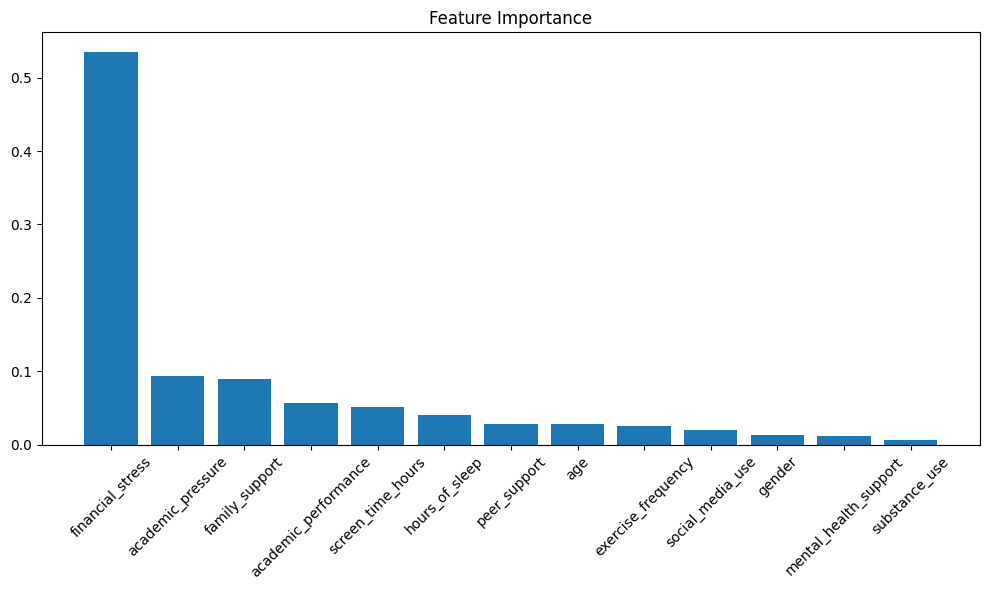

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances from the trained Random Forest model
importances = model.feature_importances_
feature_names = X.columns

# Sort the features by importance
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), feature_names[indices], rotation=45)
plt.tight_layout()
plt.show()


In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [16]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(random_state=42)
log_model.fit(X_train_scaled, y_train)


LogisticRegression(random_state=42)

In [17]:
y_pred = log_model.predict(X_test_scaled)


In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.95

Confusion Matrix:
 [[28  0]
 [ 3 29]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95        28
           1       1.00      0.91      0.95        32

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60



In [19]:
import pandas as pd

coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_model.coef_[0]
})
print(coefficients.sort_values(by='Coefficient', ascending=False))


                  Feature  Coefficient
3        financial_stress     4.098187
10      academic_pressure     1.648908
5            peer_support     0.291210
9           substance_use     0.085025
11       social_media_use     0.040552
1                  gender     0.020779
8       screen_time_hours    -0.055446
0                     age    -0.094756
6      exercise_frequency    -0.166471
7          hours_of_sleep    -0.226044
2    academic_performance    -0.269256
12  mental_health_support    -0.336298
4          family_support    -1.575193


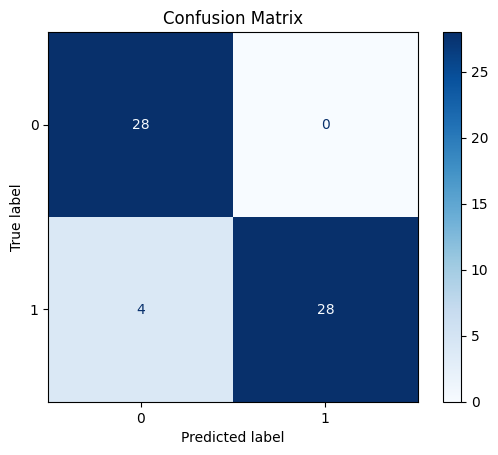

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


In [21]:
import joblib
joblib.dump(log_model, 'logistic_model.pkl')


['logistic_model.pkl']

In [22]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 44.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.4 MB/s eta 0:00:00


In [23]:
import streamlit as st
import joblib
import numpy as np


In [26]:

# Load model
model = joblib.load('logistic_model.pkl')

st.title("🧠 Student Mental Health Risk Predictor")

st.markdown("Enter the student’s lifestyle and academic data to assess their mental health risk.")

# Collect user input for each feature
age = st.slider("Age", 15, 40, 18)
gender = st.selectbox("Gender", ["Male", "Female"])
academic_performance = st.slider("Academic Performance (e.g. GPA)", 0.0, 5.0, 3.0)
financial_stress = st.selectbox("Financial Stress (0 = No, 1 = Yes)", [0, 1])
family_support = st.slider("Family Support Level (0-10)", 0, 10, 5)
peer_support = st.slider("Peer Support Level (0-10)", 0, 10, 5)
exercise_frequency = st.slider("Exercise Frequency per Week", 0, 7, 3)
hours_of_sleep = st.slider("Average Sleep Hours per Night", 0.0, 12.0, 6.0)
screen_time_hours = st.slider("Daily Screen Time (in hours)", 0.0, 24.0, 6.0)
substance_use = st.selectbox("Substance Use (0 = No, 1 = Yes)", [0, 1])
academic_pressure = st.slider("Academic Pressure Level (0-10)", 0, 10, 5)
social_media_use = st.slider("Social Media Use Level (0-10)", 0, 10, 5)
mental_health_support = st.selectbox("Access to Mental Health Support? (0 = No, 1 = Yes)", [0, 1])
diagnosed_mental_illness = st.selectbox("Previously Diagnosed Mental Illness? (0 = No, 1 = Yes)", [0, 1])

# Encode gender (assuming you used binary encoding: Female=0, Male=1)
gender_binary = 1 if gender == "Male" else 0

# Put all input into the correct feature order
features = np.array([[age, gender_binary, academic_performance, financial_stress,
                      family_support, peer_support, exercise_frequency, hours_of_sleep,
                      screen_time_hours, substance_use, academic_pressure, social_media_use,
                      mental_health_support, diagnosed_mental_illness]])

if st.button("Predict Risk"):
    prediction = model.predict(features)

    if prediction[0] == 1:
        st.error("⚠️ Prediction: High Mental Health Risk")
    else:
        st.success("✅ Prediction: Low Mental Health Risk")


2025-05-13 12:23:40.676 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-13 12:23:40.681 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-13 12:23:40.682 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-13 12:23:40.683 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-13 12:23:40.687 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-13 12:23:40.688 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-13 12:23:40.689 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-13 12:23:40.690 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [28]:
code = '''
# your Streamlit code goes here
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Sample app
st.title("Mental Health Risk Prediction for First-Year Students")

# Upload data
uploaded_file = st.file_uploader("Upload your CSV file", type="csv")

if uploaded_file:
    data = pd.read_csv(uploaded_file)
    st.write("Data Preview", data.head())

    # Continue with preprocessing, model training, etc.
    if st.button("Train Model"):
        # Assuming 'label' is the target
        X = data.drop("label", axis=1)
        y = data["label"]

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        model = LogisticRegression()
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)

        st.success(f"Model Accuracy: {acc:.2f}")
'''

with open("app.py", "w") as file:
    file.write(code)

from google.colab import files
files.download("app.py")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>